In [1]:
#Techniques for outlier detection and removal:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_10046/2292542296.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

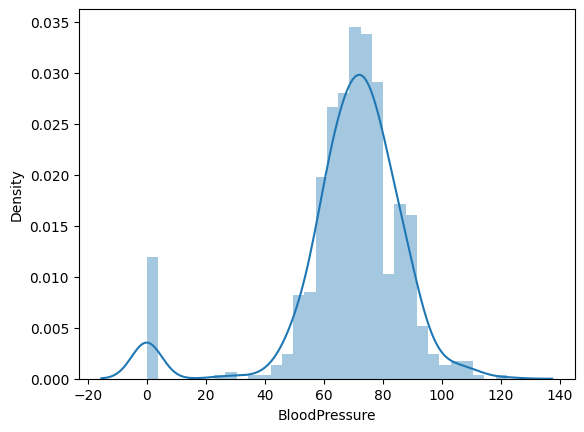

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv')
df

sns.distplot(df['BloodPressure'])

Trimming

In [3]:
#Finding the Boundary Values
print("Highest allowed",df['BloodPressure'].mean() + 3*df['BloodPressure'].std())
print("Lowest allowed",df['BloodPressure'].mean() - 3*df['BloodPressure'].std())

Highest allowed 127.17289026193433
Lowest allowed 11.038047238065673


In [4]:
#Trimming of Outliers
new_df = df[(df['BloodPressure'] < 127.172890) & (df['BloodPressure'] > 11.038047)]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


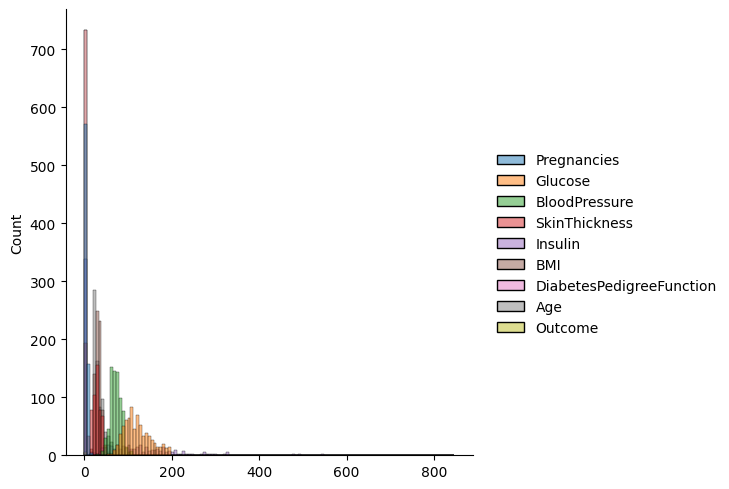

In [5]:
sns.displot(new_df)

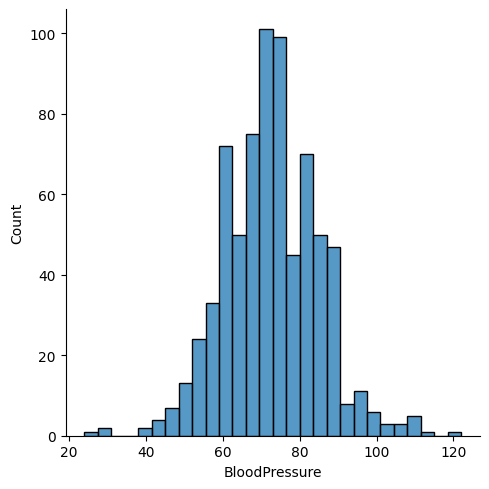

In [6]:
sns.displot(new_df['BloodPressure'])

/tmp/ipykernel_10046/4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

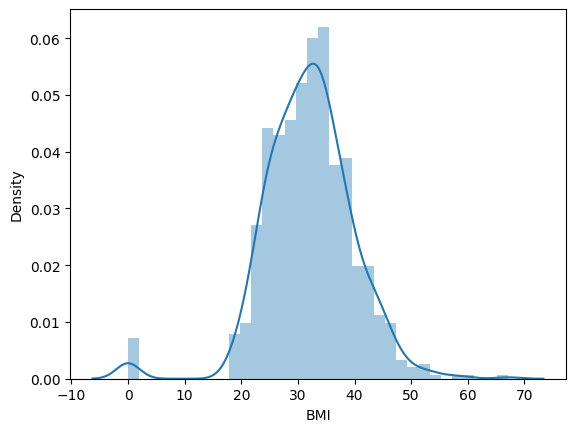

In [7]:
sns.distplot(df['BMI'])

In [8]:
#Finding the Boundary Values
print("Highest allowed",df['BMI'].mean() + 3*df['BMI'].std())
print("Lowest allowed",df['BMI'].mean() - 3*df['BMI'].std())

Highest allowed 55.64505908612634
Lowest allowed 8.340097163873661


In [9]:
#removing outlier
#Trimming of Outliers
BMI_ot = df[(df['BMI'] < 55.6450590) & (df['BMI'] > 8.3400971)]
BMI_ot

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/tmp/ipykernel_10046/526355671.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BMI_ot)


<Axes: ylabel='Density'>

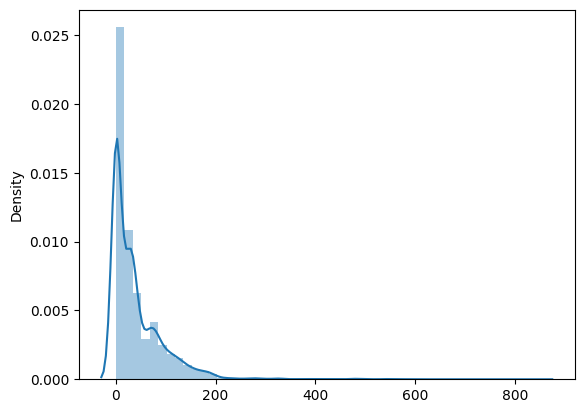

In [10]:
sns.distplot(BMI_ot)

In [11]:
#fix limits
upper_limit = df['BloodPressure'].mean() + 3*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 3*df['BloodPressure'].std()
print(upper_limit,lower_limit)

127.17289026193433 11.038047238065673


In [13]:
df['BloodPressure'] = np.where(df['BloodPressure']>upper_limit,upper_limit,df['BloodPressure'])
df['BloodPressure'] = np.where(df['BloodPressure']<lower_limit,lower_limit,df['BloodPressure'])

print((df['BloodPressure']).min())
print((df['BloodPressure']).max())

11.038047238065673
122.0


<Axes: >

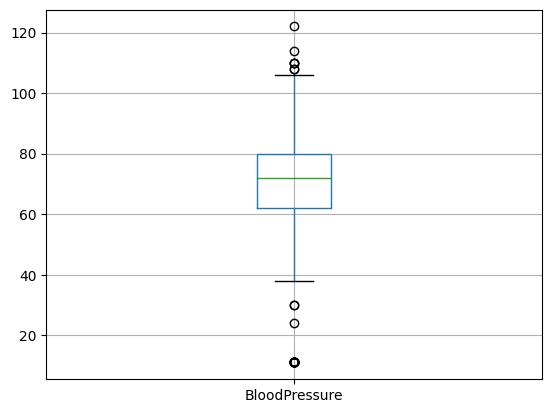

In [14]:
#apply capping
df['BloodPressure'] = np.where(
    
    df['BloodPressure']>upper_limit,    
    upper_limit,
    np.where(
        df['BloodPressure']<lower_limit,
        lower_limit,
        df['BloodPressure']
        )
    )
df.boxplot("BloodPressure")

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsb

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
134,2,96,68,13,49,21.1,0.647,26,0
176,6,85,78,0,0,31.2,0.382,42,0
480,3,158,70,30,328,35.5,0.344,35,1
520,2,68,70,32,66,25.0,0.187,25,0
73,4,129,86,20,270,35.1,0.231,23,0


<Axes: >

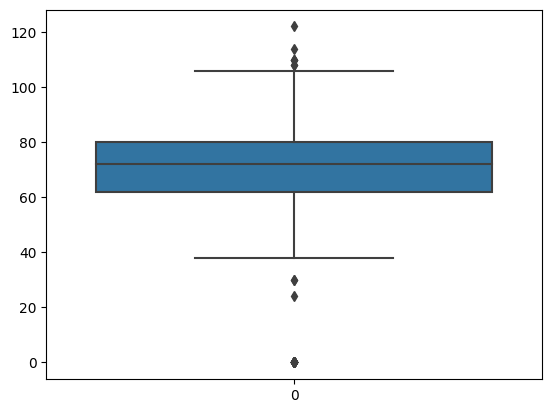

In [20]:
sns.boxplot(df['BloodPressure'])

In [21]:
#Finding the IQR
percentile25 = df['BloodPressure'].quantile(0.25)
percentile75 = df['BloodPressure'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

18.0
62.0
80.0


In [22]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

107.0
35.0


In [23]:
#finding outliers
df[df['BloodPressure'] > upper_limit]
df[df['BloodPressure'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
125,1,88,30,42,99,55.0,0.496,26,1
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1


In [24]:
#trimming
new_df1 = df[df['BloodPressure'] < upper_limit]
new_df1.shape
new_df = new_df1[new_df1['BloodPressure'] > lower_limit]

/tmp/ipykernel_10046/2707011699.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])
/tmp/ipykernel_10046/2707011699.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['BloodPressure'])


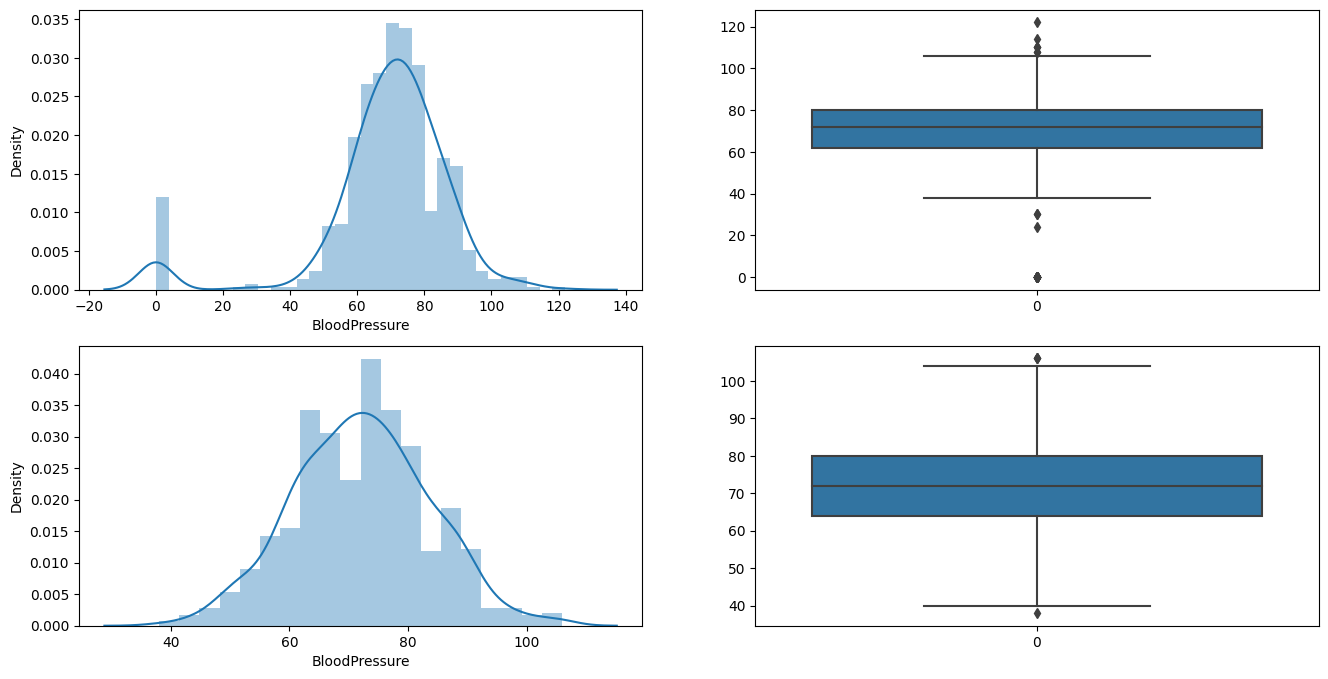

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['BloodPressure'])
plt.subplot(2,2,2)
sns.boxplot(df['BloodPressure'])
plt.subplot(2,2,3)
sns.distplot(new_df['BloodPressure'])
plt.subplot(2,2,4)
sns.boxplot(new_df['BloodPressure'])
plt.show()

Case study

In [27]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [28]:
# Read in the dataset
airbnb = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/airbnb.csv?raw=true', index_col = 'Unnamed: 0')
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


In [29]:
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


In [30]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

In [32]:
airbnb.notnull()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
10015,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
10016,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
10017,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Data type problems:
Problem 1: We can see that the coordinates column is probably a string (str) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to float.
Problem 2: Similar to coordinates - the price column also is a string with $ attached to each price point, we need to convert that to float if we want a good understanding of the dataset.
Problem 3: We need to make sure date columns (last_review and listing_added) are in datetime to allow easier manipulation of data data.

Missing data problems:
Problem 4: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

Text/categorical data problems:
Problem 5: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in neighbourhood_full column.
Problem 6: Looking at room_type, let's replace those values to make them 'Shared Room', 'Private Home/Apartment', 'Private Room' and 'Hotel Room'.

In [33]:
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [36]:
workFile_airbnb = airbnb

In [37]:
workFile_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

In [38]:
# Remove "(" and ")" from coordinates
workFile_airbnb['coordinates'] = workFile_airbnb['coordinates'].str.replace("(","")
workFile_airbnb['coordinates'] = workFile_airbnb['coordinates'].str.replace(")","")
# Print the header of the column
workFile_airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [39]:
# Split column into two
lat_long = workFile_airbnb['coordinates'].str.split(",", expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [40]:
# Assign correct columns to latitude and longitude columns in airbnb
workFile_airbnb['latitude'] = lat_long[0]
workFile_airbnb['longitude'] = lat_long[1]
# Print the header and confirm new column creation
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [41]:
# Convert latitude and longitude to float
workFile_airbnb['latitude'] = workFile_airbnb['latitude'].astype('float')
workFile_airbnb['longitude'] = workFile_airbnb['longitude'].astype('float')
# Print dtypes again
workFile_airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [ ]:
# Drop coordinates column
workFile_airbnb.drop('coordinates', axis = 1, inplace = True)

In [45]:
workFile_airbnb.sample(5)

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
3900,35662019,Cheap price near Timesquare,79269209,소정,"Manhattan, Hell's Kitchen",Private room,63$,0,NaN,NaN,250,NaN,NaN,NaN,2018-03-31,40.75625,-73.99357
4808,17667188,Private Bedroom in Rego Park / Forest Hills,120261070,Luci,"Queens, Rego Park",Private room,75$,0,NaN,NaN,0,NaN,NaN,NaN,2018-06-23,40.72460,-73.85688
4968,36129923,Space to breath in Crown Heights,6322527,Emily,"Brooklyn, Crown Heights",Private room,75$,2,2019-06-30,2.00,89,3.502566,2.4,0.617428,2018-12-25,40.67122,-73.94093
8001,6013186,Lovely 1BR Garden Apartment w/Private Garden,31175000,Kathryn,"Brooklyn, Bedford-Stuyvesant",Entire home/apt,109$,79,2019-06-30,2.07,0,3.889352,94.8,0.758064,2018-12-25,40.68446,-73.93956
8230,25979705,Pre-War Elegance in Soho / West Village,8881505,Megan,"Manhattan, SoHo",Entire home/apt,175$,20,2019-06-13,2.01,36,4.401773,24.0,0.774686,2018-12-08,40.72786,-74.00500


In [50]:
workFile_airbnb.to_csv("Data_cleaning AirBNB.csv")

In [47]:
# Remove $ from price before conversion to float
workFile_airbnb['price'] = workFile_airbnb['price'].str.strip("$")
# Print header to make sure change was done
workFile_airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [55]:
# Convert price to float
workFile_airbnb['price'] = workFile_airbnb['price'].astype('float')
# Calculate mean of price after conversion
workFile_airbnb['price'].mean()

150.90512217564665

In [54]:
workFile_airbnb['price'].max()

8000.0

In [51]:
# Print header of two columns
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [52]:
# Convert both columns to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format = '%Y-%m-%d')

In [53]:
# Print header and datatypes of both columns again
print(airbnb[['listing_added', 'last_review']].head())
print(airbnb[['listing_added', 'last_review']].dtypes)

  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaT
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12
listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


In [57]:
# Print unique values of `room_type`
workFile_airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [58]:
# Deal with capitalized values
workFile_airbnb['room_type'] = workFile_airbnb['room_type'].str.lower()
workFile_airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [59]:
# Deal with trailing spaces
workFile_airbnb['room_type'] = workFile_airbnb['room_type'].str.strip()
workFile_airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [60]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
mappings = {
    'private room': 'Private Room',
    'private': 'Private Room',
    'entire home/apt': 'Entire place',
    'shared room': 'Shared room',
    'home': 'Entire place'
}


# Replace values and collapse data
workFile_airbnb['room_type'] = workFile_airbnb['room_type'].replace(mappings)
workFile_airbnb['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

In [63]:
workFile_airbnb.sample(5)

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
137,24508874,HOTEL ROOM LIKE!!! WITH AFFORDABLE RATE!!! ...,59156312,Viviana,"Queens, Woodhaven",Private Room,89.0,29,2019-06-22,2.00,355,3.290584,34.8,0.767917,2018-12-17,40.68654,-73.86672
9341,1077179,Large luxury 1 bedroom loft in Gramercy,5927702,Shayne,"Manhattan, Gramercy",Entire place,250.0,17,2019-01-31,0.39,327,3.205582,20.4,0.783826,2018-07-28,40.73775,-73.98324
7758,2465962,1 BEDROOM ENTIRE HOME/APT❤ ASTORIA,1000014,Amy,"Queens, Astoria",Entire place,125.0,13,2015-09-28,0.22,0,4.676043,15.6,0.871373,2015-03-25,40.76122,-73.91163
9375,818325,Pied-à-Terre in Midtown Manhattan,4298167,Shane,"Manhattan, Kips Bay",Entire place,148.0,29,2019-06-01,0.37,188,4.052250,34.8,0.717716,2018-11-26,40.74450,-73.97583
8372,9755785,"540 Main Street, Apt 428",47512544,Yingyuan,"Manhattan, Roosevelt Island",Private Room,NaN,1,2016-01-05,0.02,0,3.923799,1.2,0.724664,2015-07-02,40.76206,-73.94904


In [64]:
# Print header of column
workFile_airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [65]:
# Split neighbourhood_full
borough_neighbourhood = workFile_airbnb['neighbourhood_full'].str.split(",", expand = True)
borough_neighbourhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [66]:
# Create borough and neighbourhood columns
workFile_airbnb['borough'] = borough_neighbourhood[0]
workFile_airbnb['neighbourhood'] = borough_neighbourhood[1]
# Print header of columns
workFile_airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side


In [ ]:
# Drop neighbourhood_full column
workFile_airbnb.drop('neighbourhood_full', axis = 1, inplace = True)

In [69]:
# Strip white space from neighbourhood column
workFile_airbnb['neighbourhood'] = workFile_airbnb['neighbourhood'].str.strip()
# Print unique values again
print(workFile_airbnb['neighbourhood'].unique())

['Flatlands' 'Upper West Side' 'Brooklyn Heights' 'Lower East Side'
 'Greenwich Village' 'Harlem' 'Sheepshead Bay' 'Theater District'
 'Bushwick' 'Laurelton' 'Mott Haven' 'Flushing' 'Crown Heights' 'Midtown'
 'Financial District' 'East Village' 'Park Slope' 'Washington Heights'
 'Williamsburg' 'Chelsea' 'Bedford-Stuyvesant' 'Gowanus' 'Upper East Side'
 'Ditmars Steinway' 'Cypress Hills' "Hell's Kitchen" 'Ridgewood'
 'Marble Hill' 'Kips Bay' 'Prospect Heights' 'East New York' 'Concord'
 'Stapleton' 'Astoria' 'East Harlem' 'Sunnyside' 'Gramercy'
 'Prospect-Lefferts Gardens' 'Sunset Park' 'Forest Hills'
 'Windsor Terrace' 'Clinton Hill' 'Murray Hill' 'Flatiron District'
 'Greenpoint' 'East Flatbush' 'Tribeca' 'Woodhaven' 'Fort Greene' 'Inwood'
 'Chinatown' 'Rockaway Beach' 'Woodside' 'Bayside' 'Bensonhurst' 'SoHo'
 'Red Hook' 'West Village' 'South Slope' 'Richmond Hill' 'Jamaica'
 'Boerum Hill' 'St. George' 'Clason Point' 'College Point' 'Vinegar Hill'
 'Rego Park' 'East Elmhurst' 'Kensin

In [70]:
# Isolate rows of rating > 5.0
workFile_airbnb[airbnb['rating'] > 5.0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [71]:
# Drop these rows and make sure we have effected changes
workFile_airbnb.drop(workFile_airbnb[workFile_airbnb['rating'] > 5.0].index, inplace = True)

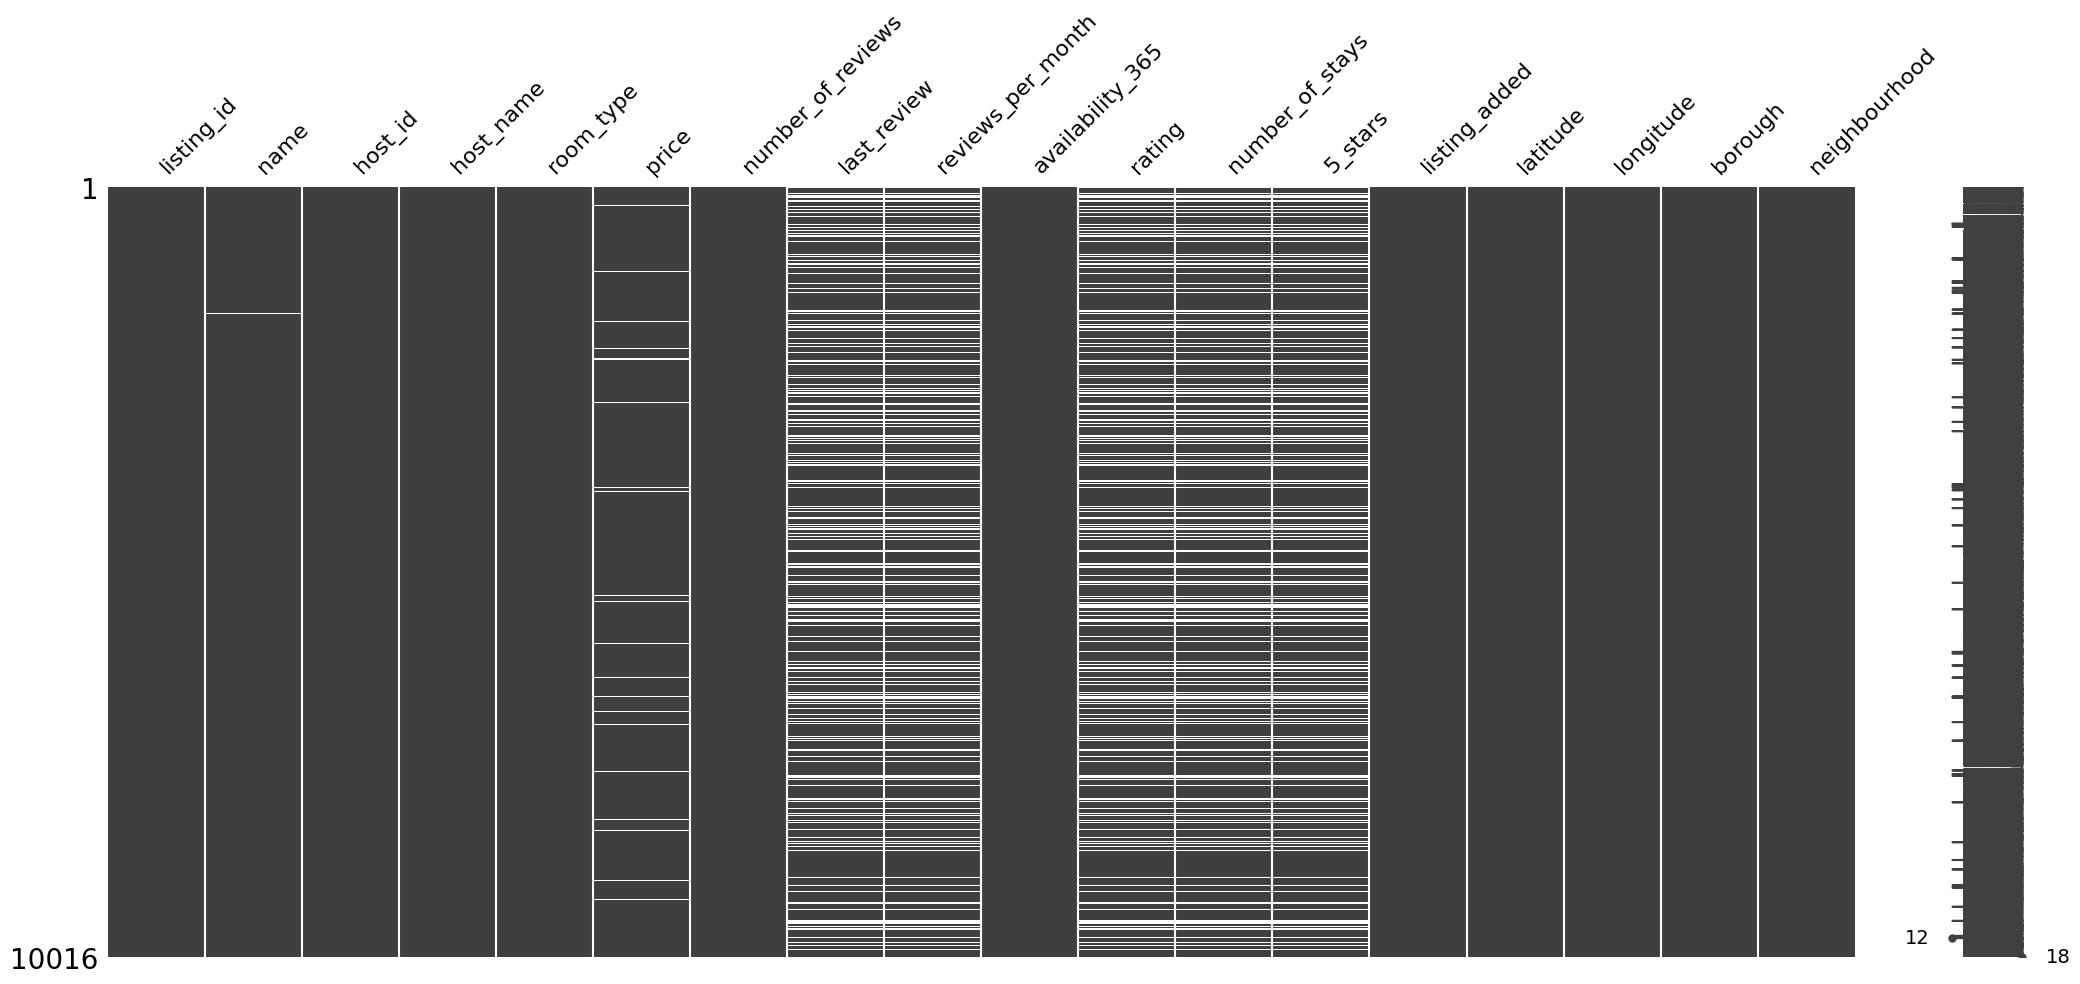

In [72]:
# Visualize the missingness
msno.matrix(workFile_airbnb)
plt.show()

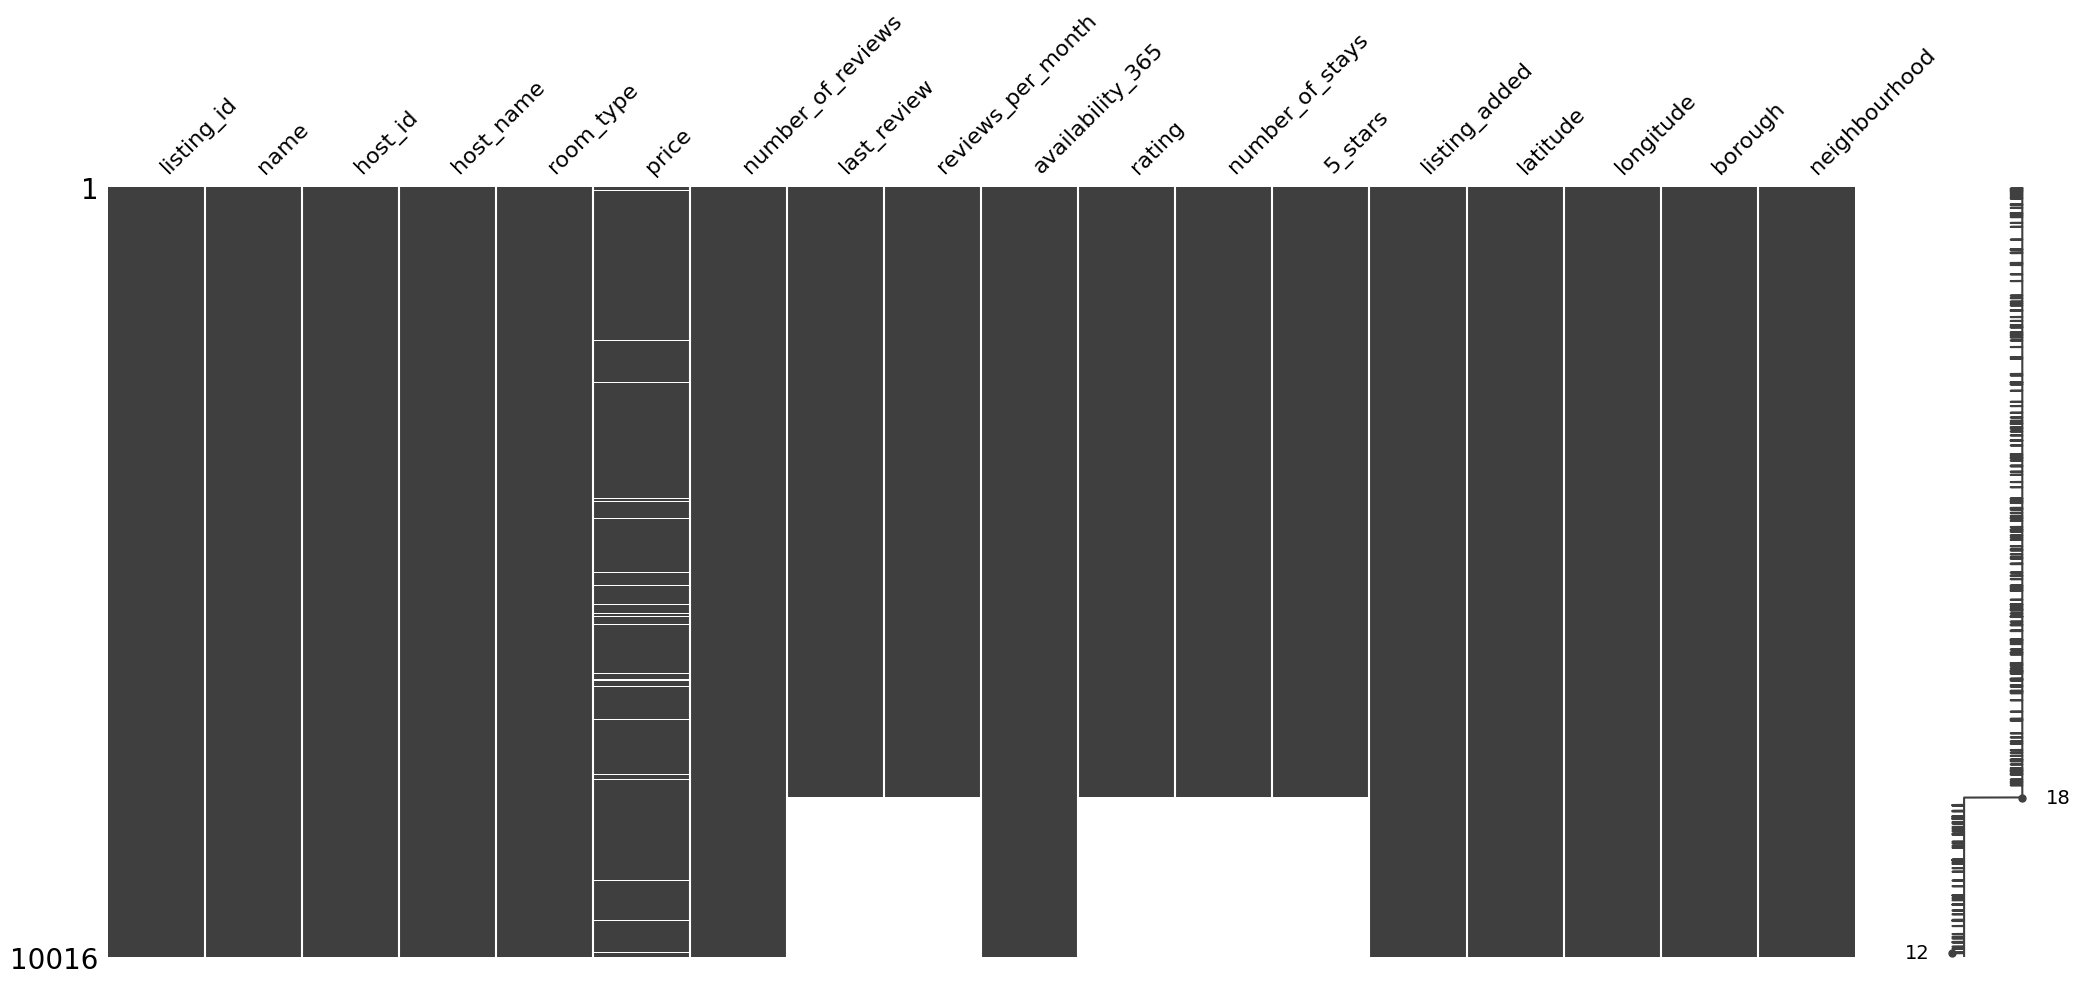

In [73]:
# Visualize the missingness on sorted values
msno.matrix(workFile_airbnb.sort_values(by = 'rating'))
plt.show()

In [74]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
workFile_airbnb[workFile_airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0,0.0,2075.000000,0.0,0.0,0.0,2075,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaT,NaN,104.531566,NaN,NaN,NaN,2018-06-08 17:01:31.951807232,40.732074,-73.956771
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaT,NaN,0.000000,NaN,NaN,NaN,2018-02-03 00:00:00,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaT,NaN,0.000000,NaN,NaN,NaN,2018-04-05 00:00:00,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaT,NaN,7.000000,NaN,NaN,NaN,2018-06-05 00:00:00,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaT,NaN,211.000000,NaN,NaN,NaN,2018-08-13 00:00:00,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaT,NaN,365.000000,NaN,NaN,NaN,2018-10-17 00:00:00,40.911690,-73.727310
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,NaN,138.266525,NaN,NaN,NaN,NaN,0.051168,0.041065


In [75]:
# Impute missing data
workFile_airbnb = workFile_airbnb.fillna({'reviews_per_month':0,
'number_of_stays':0,
'5_stars':0})


# Create is_rated column
is_rated = np.where(workFile_airbnb['rating'].isna() == True, 0, 1)
workFile_airbnb['is_rated'] = is_rated

workFile_airbnb.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                 238
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64